<a href="https://colab.research.google.com/github/nisha1365/Playground-Series-S3E12-Kaggle-competition/blob/main/PS_S3E12_XGBoost_nisha1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from itertools import product

In [87]:
df = pd.read_csv('/content/train.csv',index_col="id").reset_index(drop=True)
df

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...
409,1.011,5.21,527,21.4,75,1.53,0
410,1.024,5.53,577,19.7,224,0.77,0
411,1.018,6.28,455,22.2,270,7.68,1
412,1.008,7.12,325,12.6,75,1.03,1


In [88]:
df.corr()

,gravity,ph,osmo,cond,urea,calc,target
gravity,1.000000,-0.290349,0.692317,0.470433,0.631710,0.494304,0.282577
ph,-0.290349,1.000000,-0.309495,-0.190185,-0.279749,-0.214402,-0.094983
osmo,0.692317,-0.309495,1.000000,0.708480,0.809880,0.472114,0.244770
cond,0.470433,-0.190185,0.708480,1.000000,0.499109,0.330609,0.172224
urea,0.631710,-0.279749,0.809880,0.499109,1.000000,0.489879,0.265211
calc,0.494304,-0.214402,0.472114,0.330609,0.489879,1.000000,0.467439
target,0.282577,-0.094983,0.244770,0.172224,0.265211,0.467439,1.000000


In [89]:
df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [90]:
df.isnull().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  414 non-null    float64
 1   ph       414 non-null    float64
 2   osmo     414 non-null    int64  
 3   cond     414 non-null    float64
 4   urea     414 non-null    int64  
 5   calc     414 non-null    float64
 6   target   414 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 22.8 KB


In [92]:
import seaborn as sns

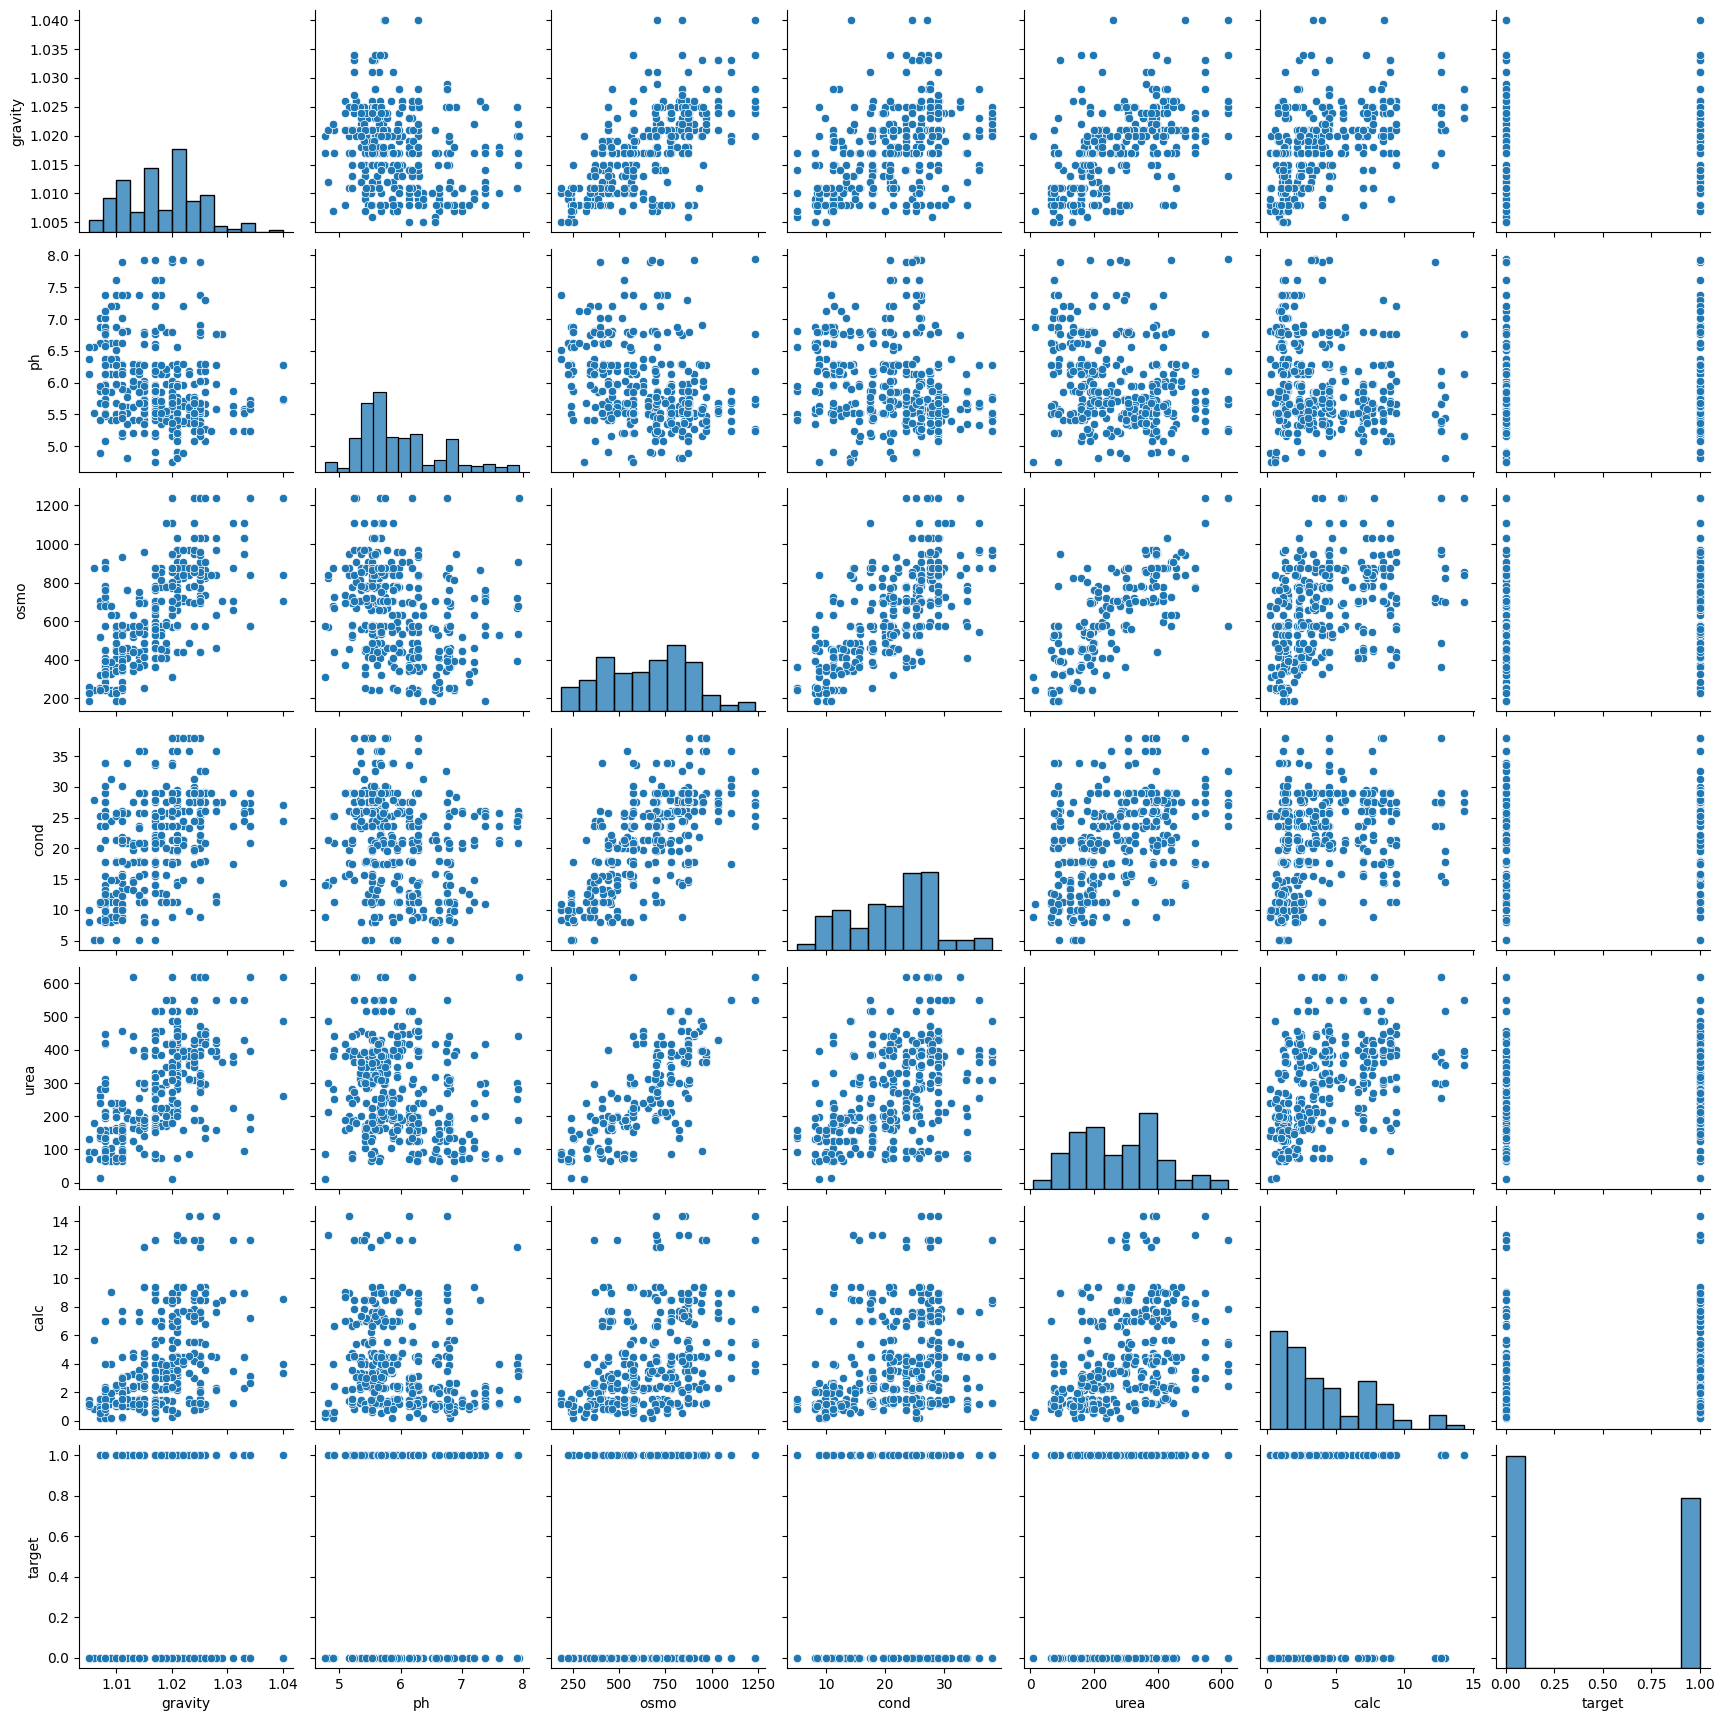

In [93]:
sns.pairplot(df)

In [94]:

X_train = df.drop(columns="target")
y_train = df["target"]

In [95]:
df2 = pd.read_csv('/content/test.csv', index_col = "id")
df2.head()

,gravity,ph,osmo,cond,urea,calc
id,,,,,,
414,1.017,5.24,345,11.5,152,1.16
415,1.020,5.68,874,29.0,385,3.46
416,1.024,5.36,698,19.5,354,13.00
417,1.020,5.33,668,25.3,252,3.46
418,1.011,5.87,567,29.0,457,2.36


In [96]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
from xgboost import XGBRegressor


xgb = XGBRegressor(n_estimators=100,learning_rate= 0.1,max_depth=3,subsample= 0.5,seed=1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [109]:
X_test = df2

In [110]:
pred = xgb.predict(X_test)

In [111]:
pred[5]


0.6649933

In [112]:
submission = pd.DataFrame({'id':X_test.index, 'target': pred})
submission


,id,target
0,414,0.459803
1,415,0.528734
2,416,0.859670
3,417,0.446777
4,418,0.254275
...,...,...
271,685,0.813484
272,686,0.113466
273,687,0.501990
274,688,0.065625


In [113]:
submission.to_csv('submission_3.csv', index = False)